In [1]:
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
file_path = "crypto_data.csv"

In [3]:
df = pd.read_csv(file_path,index_col=False)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
df.shape

(1252, 7)

# Data Preparation

In [5]:
# Filter by all the "True" values in the IsTrading column. 
df_filter = df[(df['IsTrading']==True)]

In [6]:
df_filter.shape

(1144, 7)

In [7]:
# drop the column titled IsTrading
df_filter = df_filter.drop(['IsTrading', 'CoinName'], axis = 1)

In [8]:
df_filter.shape

(1144, 5)

In [9]:
# Searching for Null values by column
df_filter.isnull().sum()

Unnamed: 0           0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [10]:
# Searching for duplicates
df_filter.duplicated().sum()

0

In [11]:
# removing all rows with at least one null value
df_filter = df_filter.dropna(axis=0, how='any')

In [12]:
df_filter.shape

(685, 5)

In [13]:
# filtering for al rows with totalCoinsMined greater than zero
df_filter = df_filter[df_filter['TotalCoinsMined'] > 0]

In [14]:
df_filter.shape

(532, 5)

In [15]:
# Check to ensure total the CoinsMined column contains values greater that zero
df_filter.describe()

,TotalCoinsMined
count,5.320000e+02
mean,5.340456e+09
std,4.564568e+10
min,4.199995e+01
25%,8.359849e+06
50%,2.474397e+07
75%,1.867250e+08
max,9.899887e+11


In [16]:
# To Drop Coin Name and Unnamed (irrelevant data) columns from the dataframe  
df_filter = df_filter.drop(['Unnamed: 0'], axis = 1)

In [17]:
df_filter.shape

(532, 4)

In [18]:
# To convert Algorithm and ProofType to numeric values
df_filter_with_dummies = pd.get_dummies(df_filter, columns=['Algorithm', 'ProofType'],drop_first=True, dtype=float)

* Examine the number of rows and columns of the DataSet: Rows are the same at 532, Columns increased from 4 to 96 due to the get_dummies conversion

In [19]:
df_filter_with_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.055185e+09,532000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.927942e+10,314159265359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.792718e+07,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.076842e+08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1242,1.493105e+07,250000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,9.802226e+08,1400222610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,7.296538e+06,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_filter_with_dummies.describe()

,TotalCoinsMined,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
count,5.320000e+02,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,5.340456e+09,0.001880,0.001880,0.003759,0.005639,0.001880,0.003759,0.003759,0.001880,0.001880,...,0.330827,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880,0.001880
std,4.564568e+10,0.043355,0.043355,0.061256,0.074952,0.043355,0.061256,0.061256,0.043355,0.043355,...,0.470954,0.043355,0.043355,0.043355,0.043355,0.043355,0.043355,0.043355,0.043355,0.043355
min,4.199995e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.359849e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.474397e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.867250e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.899887e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Use Standard Scaler/Min Max Scaler for columns with larger values which might unduly influence the outcome.
scaler = MinMaxScaler()
# scaler = StandardScaler()

In [22]:
scaled_data = scaler.fit_transform(df_filter_with_dummies)

# Dimensionality Reduction

* Preserve ~90% of the explained variance in dimentionality reduction 

In [23]:
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [24]:
# Cummulative explained variance is ~0.91.
pca.explained_variance_ratio_.cumsum()

array([0.25786735, 0.42664167, 0.56010234, 0.63372367, 0.67978525,
       0.70325577, 0.72467002, 0.7441026 , 0.76194616, 0.77650135,
       0.78999643, 0.80223088, 0.81360199, 0.82472606, 0.83460437,
       0.84292144, 0.85001103, 0.85597251, 0.86107617, 0.86603051,
       0.87098484, 0.87593918, 0.88087746, 0.88579357, 0.89051693,
       0.89477803, 0.89881774, 0.9025873 ])

In [25]:
print(pca_transformed_data.shape)

(532, 28)


* The number of columns was reduced from 96 to 28 using the PCA fit transform command.  The dimentionality has been reduced and now takes up much less space, while maintaning a high percentage of its original variance. 

In [26]:
tsne = TSNE(perplexity=50, learning_rate=200)
# , learning_rate=100

In [27]:
X_pca_tsne = tsne.fit_transform(pca_transformed_data)
X_pca_tsne

array([[  9.219942 ,  17.598234 ],
       [  6.132474 ,  19.911818 ],
       [  1.8442048,  13.53119  ],
       ...,
       [  5.0373087, -16.20271  ],
       [ -1.369467 ,  -9.83539  ],
       [ -8.764248 ,  -1.3627934]], dtype=float32)

* The number of columns was reduced from 28 to 2 using the t-SNE command.  

In [28]:
X_pca_tsne.shape

(532, 2)

* Per the scatter plot below - visually, there appears to be 4 possible distinct clusters.  See color coded plot below.

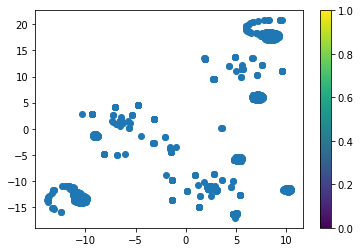

In [29]:
plt.scatter(X_pca_tsne[:,0],X_pca_tsne[:,1])
plt.colorbar()
plt.show()

# Cluster Analysis with k-Means

* Based on the elbow plot below - the elbow point appears to be between points 3 and 4.  The inertia starts to decrease significantly at point 4 and would capture the most intercia while trying to maintain a minimun number of clusters used. 

C:\Users\lcswi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


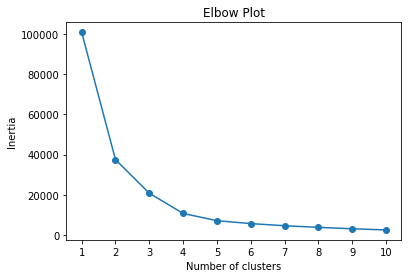

In [38]:
# Perform KMeans on the pca'd tsne'd features of X
from sklearn.cluster import KMeans

inertia = []

k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca_tsne)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
X_pca_tsne_elbow = pd.DataFrame(elbow_data)
X_pca_tsne_elbow

plt.plot(X_pca_tsne_elbow['k'], X_pca_tsne_elbow['inertia'], marker = "o")
plt.xticks(range(1,11))
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [31]:
X_pca_tsne = pd.DataFrame(X_pca_tsne)
# X_pca_tsne

In [32]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [33]:
clusters = get_clusters(4, X_pca_tsne)
clusters

,0,1,class
0,9.219942,17.598234,1
1,6.132474,19.911818,1
2,1.844205,13.531190,1
3,10.345451,-11.421276,2
4,1.329700,-14.954030,2
...,...,...,...
527,-1.018119,-3.460475,3
528,7.119725,18.288187,1
529,5.037309,-16.202709,2
530,-1.369467,-9.835390,2


In [34]:
clusters = pd.DataFrame(clusters)
clusters = clusters.rename(columns = {0:'ColumnOne'})
clusters = clusters.rename(columns = {1:'ColumnTwo'})

In [35]:
clusters

,ColumnOne,ColumnTwo,class
0,9.219942,17.598234,1
1,6.132474,19.911818,1
2,1.844205,13.531190,1
3,10.345451,-11.421276,2
4,1.329700,-14.954030,2
...,...,...,...
527,-1.018119,-3.460475,3
528,7.119725,18.288187,1
529,5.037309,-16.202709,2
530,-1.369467,-9.835390,2


In [36]:
def show_clusters(df):
    plt.scatter(df["ColumnOne"], df["ColumnTwo"], c=df['class'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

* The four separate and destinct clusters are shown below via a color bar. 

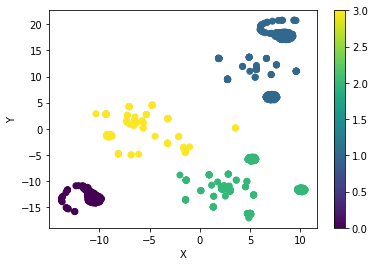

In [37]:
show_clusters(clusters)

# Recommendation

* After implementing the Demensionality Reduction and Cluster Analysis processes, the initial data visualization plot indicates the crytocurrencies can be clustered.  In addition, the elbow chart indicates that 4 clusters would capture the most intercia.  